In [65]:
from sklearn import datasets
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
powers = [1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4]
zoomed = np.array(range(1,101))

In [2]:
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris['data'].shape

(150, 4)

In [7]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris['target'].shape

(150,)

In [10]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
X = pd.DataFrame(iris['data'],columns=iris['feature_names'])
X.head(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4


In [18]:
model = KNeighborsClassifier()

In [19]:
y = iris.target

In [20]:
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
147/150

0.98

In [24]:
model.predict(X)-y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [25]:
model.score(X,y)

0.9666666666666667

In [26]:
145/150

0.9666666666666667

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5,stratify = y)

In [30]:
# data  50 50 50
# test  20 10 15
# train 30 40 35

# test  15 15 15
# train 35 35 35



In [31]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
84,5.4,3.0,4.5,1.5
31,5.4,3.4,1.5,0.4
122,7.7,2.8,6.7,2.0
101,5.8,2.7,5.1,1.9
42,4.4,3.2,1.3,0.2
41,4.5,2.3,1.3,0.3
109,7.2,3.6,6.1,2.5
146,6.3,2.5,5.0,1.9
6,4.6,3.4,1.4,0.3
127,6.1,3.0,4.9,1.8


In [32]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
98,5.1,2.5,3.0,1.1
71,6.1,2.8,4.0,1.3
108,6.7,2.5,5.8,1.8
4,5.0,3.6,1.4,0.2
57,4.9,2.4,3.3,1.0
19,5.1,3.8,1.5,0.3
126,6.2,2.8,4.8,1.8
112,6.8,3.0,5.5,2.1
123,6.3,2.7,4.9,1.8
14,5.8,4.0,1.2,0.2


In [33]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
model.predict(X_test)

array([1, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 2, 0,
       0])

In [35]:
y_test

array([1, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0,
       0])

In [36]:
43/45

0.9555555555555556

In [37]:
model.score(X_test,y_test)

0.9555555555555556

In [49]:
test_scores=[]
train_scores=[]
for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    score_test = model.score(X_test,y_test)
    score_train = model.score(X_train,y_train)
    test_scores.append(score_test)
    train_scores.append(score_train)
    

In [39]:
test_scores

[0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333,
 0.9555555555555556,
 0.9111111111111111,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.8888888888888888]

In [40]:
train_scores

[1.0,
 0.9809523809523809,
 0.9714285714285714,
 0.9619047619047619,
 0.9809523809523809,
 0.9714285714285714,
 1.0,
 0.9809523809523809,
 0.9809523809523809,
 0.9904761904761905,
 1.0,
 0.9904761904761905,
 0.9809523809523809,
 0.9809523809523809,
 0.9809523809523809,
 0.9714285714285714,
 0.9714285714285714,
 0.9809523809523809,
 0.9809523809523809,
 0.9809523809523809]

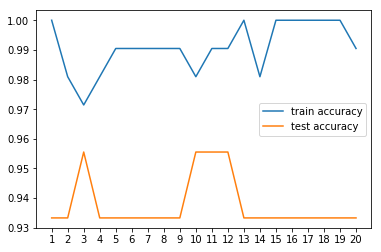

In [52]:
plt.plot(range(1,21), train_scores,label="train accuracy")
plt.plot(range(1,21), test_scores,label="test accuracy")
plt.xticks(range(1,21))
plt.legend()
plt.show()

In [10]:
cancer = datasets.load_breast_cancer()

In [11]:
X = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
knn = KNeighborsClassifier()

In [13]:
y =cancer['target']

In [14]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
knn.score(X,y)

0.9472759226713533

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                random_state=42,stratify=y)

In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
knn.score(X_test,y_test)

0.9239766081871345

In [21]:
knn.score(X_train,y_train)

0.949748743718593

In [49]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9239766081871345

In [46]:
test_scores=[]
train_scores=[]
for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    score_test = model.score(X_test,y_test)
    score_train = model.score(X_train,y_train)
    test_scores.append(score_test)
    train_scores.append(score_train)



plt.plot(range(1,21), train_scores,label="train accuracy")
plt.plot(range(1,21), test_scores,label="test accuracy")
plt.xticks(range(1,21))
plt.legend()
plt.show()

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

In [61]:
np.random.seed(5)
for i in range(10):    
    print(np.random.randint(7))

3
6
5
6
6
0
1
0
4
6


In [ ]:
KNeighborsClassifier()

In [67]:
class 1

0.2    - 1/0.2= 5
0.5    - 1/0.5= 2

7



class 2

1.1   - 1/1.1=0.9
1.0   - 1/1=1
0.8   - 1/0.8=1.25

3.15

distance = ((x2-x1)^2+(y2-y1)^2)^(1/2)   p =2

distance = |x2-x1|+|y2-y1|   p=1

distance = (|x2-x1|^3+|y2-y1|^3)^(1/3)  p=3

SyntaxError: invalid syntax (<ipython-input-67-103fa3f02a50>, line 1)

In [68]:
boston = datasets.load_boston()

In [69]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [70]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [71]:
boston.data.shape

(506, 13)

In [72]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [73]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [77]:
X = pd.DataFrame(boston.data,columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [75]:
y = boston.target

In [78]:

p1 - 1.2 - 21
p2 - 1.8 - 20
p3 - 5 -  12
p4 - 2.2 - 25
p5 - 0.3 - 21


NameError: name 'p1' is not defined

In [80]:
knn = KNeighborsRegressor()

In [81]:
knn.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [85]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
knn.predict(X_test)

array([24.54, 29.34, 14.6 , 28.96, 17.44, 31.88, 20.58, 16.06, 18.02,
       21.18, 21.9 , 21.88, 12.28, 21.6 , 23.7 , 22.22, 21.18, 14.06,
       33.72, 10.6 , 25.86, 29.34, 17.56, 21.08, 18.88, 23.16, 22.92,
       12.34, 21.9 , 21.44, 22.68, 23.42, 10.3 , 30.04, 17.54, 21.12,
       21.66, 25.9 , 22.52, 27.82, 21.18, 27.98, 38.82, 22.4 , 24.84,
       12.6 , 20.22, 28.96, 19.8 , 21.56, 22.44, 34.7 , 22.04, 21.18,
       30.36, 21.38, 12.5 , 35.04, 21.74, 20.6 , 25.3 , 38.82, 28.96,
       16.26, 30.46, 24.24, 12.24, 25.3 , 35.04, 12.34, 23.02, 22.52,
       14.82, 30.38, 21.4 ,  8.98, 19.68, 38.82, 10.94, 15.04, 22.4 ,
       15.96, 26.3 , 12.24, 22.02, 34.  , 14.16, 22.58, 26.04, 17.86,
       23.24, 15.22, 17.48, 21.7 , 24.76, 17.86, 30.16, 10.76, 10.76,
       11.92, 21.8 , 21.4 , 23.16, 21.28, 22.22, 10.88, 23.96, 24.56,
       23.02, 26.3 ,  9.98, 15.74, 23.02, 33.04, 32.8 , 15.22, 29.42,
       17.2 , 21.6 , 22.44, 24.78, 31.62,  9.78, 20.12, 23.8 , 23.7 ,
       28.28, 26.04,

In [86]:
y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4, 12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,
        8.7, 27.5, 20.7, 36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6,
       24.4,  8.8, 19.2, 25.3, 20.4, 23.1, 37.9, 15.6, 45.4, 15.7, 22.6,
       14.5, 18.7, 17.8, 16.1, 20.6, 31.6, 29.1, 15.6, 17.5, 22.5, 19.4,
       19.3,  8.5, 20.6, 17. , 17.1, 14.5, 50. , 14

In [88]:
Mean_squared_error =mean (prediction - actual_value)^2


NameError: name 'mean' is not defined

In [89]:
y_pred = knn.predict(X_test)
mean_squared_error(y_test,y_pred)

30.94554736842105

In [90]:
prediction actual_value

10    15   - -5 - 25
8      9   - -1 - 1
10    7    -  3 - 9

mean_squared_error = 11.67



SyntaxError: invalid syntax (<ipython-input-90-52482db1cbd8>, line 1)

In [91]:
knn.score(X_test,y_test)

0.5846965270656936

In [93]:
np.mean(y_test)

21.407894736842106

In [94]:
y_pred_avg = []
for i in range(len(y_test)):
    y_pred_avg.append(np.mean(y_test))

In [95]:
y_pred_avg

[21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736

In [96]:
mean_squared_error(y_test,y_pred_avg)

74.51309556786703

In [97]:
1 - mean_squared_error(y_test,y_pred)/mean_squared_error(y_test,y_pred_avg)

0.5846965270656936

In [98]:
accuracy = 1 - mse(our_model)/mse(average_prediction)


if mse(our_model)= 0  accuracy =1
if mse(our_model)== mse(avg_pred)  accuracy = 0
if mse(our_model)> mse(avg_pred) accuracy<0

R_squared metric - statistics 


SyntaxError: invalid syntax (<ipython-input-98-541c8e1ac74c>, line 4)

In [100]:
boston = datasets.load_boston()
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = boston.target
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                test_size=0.3,random_state=42)

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.5846965270656936

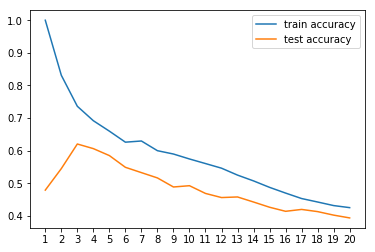

In [101]:
test_scores=[]
train_scores=[]
for i in range(1,21):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    score_test = model.score(X_test,y_test)
    score_train = model.score(X_train,y_train)
    test_scores.append(score_test)
    train_scores.append(score_train)
plt.plot(range(1,21), train_scores,label="train accuracy")
plt.plot(range(1,21), test_scores,label="test accuracy")
plt.xticks(range(1,21))
plt.legend()
plt.show()

In [106]:
knn = KNeighborsRegressor(n_neighbors=3,n_jobs=-1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6202349326037544

In [1]:
datasets.load_wine
datasets.load_diabetes

wines- classification problem 

diabetes - regression problem



SyntaxError: invalid syntax (<ipython-input-1-9213f3135e1a>, line 4)

In [3]:
boston = datasets.load_boston()

In [4]:
X= boston.data

In [5]:
y=boston.target

In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [20]:
X_rooms= X[:,[5]]

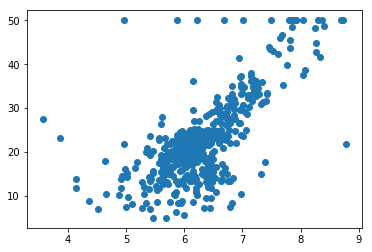

In [13]:
plt.scatter(X_rooms,y)
plt.show()

In [14]:
x data
y prediction

y = mx + c

y = b + ax

SyntaxError: invalid syntax (<ipython-input-14-48eb909fc15d>, line 1)

In [15]:
each point we have y - correct value
                   y_pred - predicted value
    error         = |y-y_pred|^2
    
Error function = sum of errors squared
 Error Function              = sigma(|y-y_pred|^2)
    d ErrorFunction/ da


p1 10 12   - 2
p2 15 17   - 2
p3 12  8   - 4

Error function = 2^2+2^2+4^2 = 24

SyntaxError: invalid syntax (<ipython-input-15-c65365ca53b9>, line 1)

In [17]:
y = b + a1 * x1 + a2 *x2 +a3 * x3+ ....... + an * xn

SyntaxError: invalid syntax (<ipython-input-17-b29a5eb15f56>, line 1)

In [18]:
model = LinearRegression()

In [21]:
model.fit(X_rooms,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

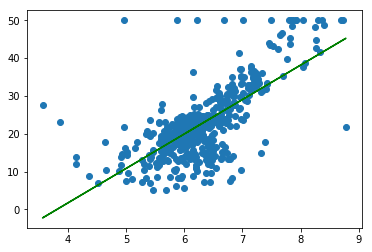

In [24]:
plt.scatter(X_rooms.flatten(),y)
plt.plot(X_rooms.flatten(), model.predict(X_rooms),'g')
plt.show()

In [25]:
model.intercept_

-34.67062077643857

In [26]:
model.coef_

array([9.10210898])

In [27]:
-34 + 9.1 * no_rooms

NameError: name 'no_rooms' is not defined

In [28]:
mean_squared_error(y,model.predict(X_rooms))

43.60055177116956

In [29]:
model = LinearRegression()

In [30]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
y_pred = model.predict(X)

In [32]:
mean_squared_error(y,y_pred)

21.897779217687496

In [33]:
model.intercept_

36.49110328036103

In [34]:
model.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

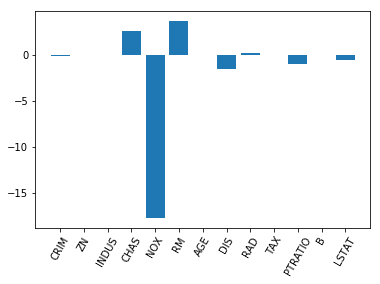

In [36]:
plt.bar(boston.feature_names,model.coef_)
plt.xticks(rotation=60)
plt.show()

In [37]:
boston = datasets.load_boston()

In [38]:
X = boston.data
y = boston.target

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                random_state=42)

In [40]:
model= LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.71092035863263

In [41]:
model.score(X_train,y_train)

0.7435020371198368

In [42]:
model.predict(X_test)

array([28.65507152, 36.50208976, 15.41877538, 25.4123428 , 18.84504144,
       23.15193132, 17.39045794, 14.07068504, 23.04106392, 20.5997909 ,
       24.82848981, 18.52972656, -6.89338718, 21.80647623, 19.23044706,
       26.18284059, 20.28099565,  5.61147028, 40.44518211, 17.57213704,
       27.44750834, 30.17592819, 10.92939394, 24.0192381 , 18.06277152,
       15.93524273, 23.13784817, 14.49181123, 22.33889889, 19.32732276,
       22.1740459 , 25.19724098, 25.31414125, 18.51391365, 16.60898647,
       17.48281643, 30.95248869, 20.19196715, 23.90566388, 24.87331497,
       13.93612301, 31.82414012, 42.56492347, 17.62944481, 27.02392519,
       17.1891161 , 13.79929973, 26.10739476, 20.31403576, 30.09296805,
       21.31686534, 34.1606385 , 15.59905068, 26.11282476, 39.31618827,
       22.99094172, 18.95021816, 33.05721471, 24.85373006, 12.91490043,
       22.67333429, 30.795732  , 31.63743635, 16.28548951, 21.06900792,
       16.58193817, 20.35778853, 26.16063538, 31.07034018, 11.92

In [43]:
y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4, 12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,
        8.7, 27.5, 20.7, 36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6,
       24.4,  8.8, 19.2, 25.3, 20.4, 23.1, 37.9, 15.6, 45.4, 15.7, 22.6,
       14.5, 18.7, 17.8, 16.1, 20.6, 31.6, 29.1, 15.6, 17.5, 22.5, 19.4,
       19.3,  8.5, 20.6, 17. , 17.1, 14.5, 50. , 14

In [44]:
Compare
KNN vs LinearRegression

Question , which is better?

KNN
1) Equal importance to all columns when calculating distance
2) column1 - 1000-2000
   column2 - 1 -2 
    
    (1000-1100)^2 = 10,000
    (1-2)^2 = 1
     
3) It works badly if all regions are not population. 
Prediction on a unpopulated region, will have large errors.

4) can handle non-linearity 
 
    

Linear Regression
1) If input does not have linear relationship with target,
it will give large errors.
2) Without scaling also it can work fine.
3) It supports different weightages for different features.

SyntaxError: invalid syntax (<ipython-input-44-84ea8bac1c6b>, line 2)

In [45]:
Logistic Regression for binary classification

a1 * x1+ a2*x2+....+ an * xn + b >=0 ? Class 1
a1 * x1+ a2*x2+....+ an * xn + b <0 ? Class 0


Fit
y is  +1 for class 1
y is -1 for class 0


Y Prediction
-infinity to infinity

0-infinity -- class 1
-infinity -0  -- class 0

Y_prediction is mapped from -infinity to +infinity to 0-1 range
using Tanh or Sigmoid function 

0.5 - 1 -- class 1
0  - 0.5  -- class 0

value is same as probability of class 1
1-value is same as probability of class 0


SyntaxError: invalid syntax (<ipython-input-45-67d1bda71beb>, line 1)

In [1]:
d(EF)/da = -2

new_value_a = a - 2 * lr


 predicted line 
    y = a*x + b

IndentationError: unexpected indent (<ipython-input-1-40d4430a3b52>, line 6)

In [2]:
iris-setosa
iris-versicolor
iris-viriginica

=> using logistic regression of 2 classes. 
How can we divide 3 classes

setosa vs not-setosa
setosa / versicolor,virgincia   - p1   - 0.2
versiclour / setosa,virginica    - p2  - 0.6
virginica / setosa,versicolour   - p3  - 0.5


Multi-class logisitic regression

SyntaxError: invalid syntax (<ipython-input-2-2d2fe5285a0d>, line 5)

In [4]:
iris= datasets.load_iris()
X,y = iris.data,iris.target

In [6]:
model= LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3,
                                                stratify=y)

model.fit(X_train,y_train)

model.score(X_test,y_test)

In [9]:
model.intercept_

array([ 0.26229552,  0.91967922, -1.08189489])

In [10]:
model.coef_

array([[ 0.37266287,  1.36553506, -2.08431168, -0.97987516],
       [ 0.5007851 , -1.64523778,  0.48315773, -1.27781124],
       [-1.58583245, -1.10417792,  2.16567334,  2.18186013]])

In [11]:
model.predict_proba(X_test)

array([[2.37538751e-04, 4.27893917e-01, 5.71868544e-01],
       [1.22251035e-02, 5.56909960e-01, 4.30864936e-01],
       [3.29866472e-03, 4.81883385e-01, 5.14817950e-01],
       [2.71892254e-02, 4.71580413e-01, 5.01230362e-01],
       [5.21610423e-03, 3.18778963e-01, 6.76004932e-01],
       [7.75674411e-04, 2.05530335e-01, 7.93693991e-01],
       [1.79756567e-02, 6.30967734e-01, 3.51056609e-01],
       [4.51220395e-02, 7.61394659e-01, 1.93483302e-01],
       [8.29544994e-01, 1.70374545e-01, 8.04614137e-05],
       [3.35837318e-03, 2.61914854e-01, 7.34726772e-01],
       [9.24908997e-01, 7.50829844e-02, 8.01849567e-06],
       [8.32958877e-01, 1.66782218e-01, 2.58905524e-04],
       [2.99201157e-04, 4.27686190e-01, 5.72014609e-01],
       [1.36659775e-03, 3.45503682e-01, 6.53129720e-01],
       [8.58251789e-01, 1.41689525e-01, 5.86862992e-05],
       [1.81345603e-03, 1.27968341e-01, 8.70218203e-01],
       [1.24358106e-01, 7.09395767e-01, 1.66246127e-01],
       [8.91240012e-01, 1.08720

In [12]:
model.predict(X_test)

array([2, 1, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2,
       1])

In [13]:
y_test

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2,
       1])

In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
model= LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                stratify=y)

model.fit(X_train,y_train)

model.score(X_test,y_test)

0.8888888888888888

In [ ]:
88.88%
100%

In [27]:
boston = datasets.load_boston()

In [28]:
X,y = boston.data,boston.target

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
model= LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7894775113691611

In [42]:
X.shape
506*0.3

151.79999999999998

In [43]:
When you have data
you have easy points to predict - 
,difficult points to predict- outliers


divide into train-test

if test gets more difficult points - score goes down
if test gets less difficult points - score goes up

When data is vey less

50,000 rows of data
15,000 rows -test
35,000 rows -train

0.65-0.79





SyntaxError: invalid syntax (<ipython-input-43-1c659f9476e3>, line 1)

In [45]:
Cross Validation

Divide full data into folds

20% - fold1
20% - fold2
20% - fold3
20% - fold4
20% - fold5

5 folds

1st time 
fold1 - test ,
folds 2,3,4,5 - train
score1

2nd time
fold2 - test,
folds 1,3,4,5 - train
score2

3rd time
fold3-test
...
score3

4th time
fold4-test
...
score4

5th time
fold5-test
...
score5



0.65-0.79

SyntaxError: invalid syntax (<ipython-input-45-850d8fe74f51>, line 1)

In [46]:
X_shuffle,y_shuffle = shuffle(X,y,random_state=42)
cross_val_score(LinearRegression(),X_shuffle,y_shuffle,cv=5,n_jobs=-1)

array([ 0.63861069,  0.71334432,  0.58645134,  0.07842495, -0.26312455])

In [47]:
np.mean(cross_val_score(LinearRegression(),X,y,cv=5,n_jobs=-1))

0.3507413509325238

In [59]:
X_shuffle,y_shuffle = shuffle(X,y,random_state=42)
cross_val_score(LinearRegression(),X_shuffle,y_shuffle,cv=5,n_jobs=-1)

array([0.7040743 , 0.6326072 , 0.75404565, 0.72816068, 0.74203936])

In [60]:
np.mean(cross_val_score(LinearRegression(),X_shuffle,y_shuffle,cv=5,n_jobs=-1))

0.7121854387279164

In [61]:
#Regularization


Error function = mean(sigma(yi - a1*x1i-a2*x2i-....-an*xni-b)^2)

Reduce error function



SyntaxError: invalid syntax (<ipython-input-61-4e1012c25b16>, line 4)

In [62]:
EF = 50 when a1 =5 , a2=5, b= 10 
EF = 49      a1=5,  a2=25,b=10    algorithm will select this


model is much more complex -> for only small decrease in error function

=> you are capturing very weak trend
=> which could be noise,

SyntaxError: invalid syntax (<ipython-input-62-43672d66b029>, line 1)

In [63]:
EF = mean(sigma(yi - a1*x1i-a2*x2i-....-an*xni-b)^2)
+ alpha * (a1**2+a2**2+a3**2+....+an**2 )


minimize only
a1**2+a2**2+a3**2+....+an**2 
=> a1=0,a2=0,...,an=0
=> b = avarge of all y . 

SyntaxError: invalid syntax (<ipython-input-63-6f13bea10303>, line 1)

In [64]:
TEF = 50+ 50  when a1 =5 , a2=5, b= 10 
TEF = 49 + 650     a1=5,  a2=25,b=10

TEF = 50+ 50  when a1 =5 , a2=5, b= 10 
TEF = 25+61        a1=6 ,a2=5,b=10
TEF = 23+74       a1=7,a2=5,b=10

SyntaxError: invalid syntax (<ipython-input-64-2730cc31df14>, line 1)

In [69]:
np.mean(cross_val_score(LinearRegression(),X_shuffle,y_shuffle,cv=5,n_jobs=-1))

0.7121854387279164

In [87]:
model= Ridge(alpha=1)
np.mean(cross_val_score(model,X_shuffle,y_shuffle,cv=5,n_jobs=-1))

0.7087422217396101

In [89]:
model= LinearRegression()
model.fit(X_shuffle,y_shuffle)
print(model.coef_)
print(model.intercept_)

[-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]
36.49110328036152


In [90]:
model1= Ridge()
model1.fit(X_shuffle,y_shuffle)
print(model1.coef_)
print(model1.intercept_)

[-1.03621516e-01  4.74143761e-02 -8.54660332e-03  2.55422124e+00
 -1.07934364e+01  3.84925574e+00 -5.36782076e-03 -1.37257042e+00
  2.89649799e-01 -1.29071544e-02 -8.76632534e-01  9.75351853e-03
 -5.34072106e-01]
31.618604411059952


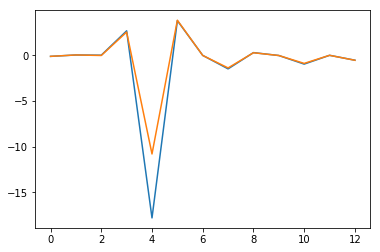

In [91]:
plt.plot(model.coef_)
plt.plot(model1.coef_)
plt.show()

In [1]:
Algorithms

KNN classification,regression
Linear Regression,Ridge,Lasso
Logistic Regression
SVM,Linear SVM c,r
Decistion Tree 
NEural networks
CNN
COmbinations like Voting classifier,Random forests,Gradient boosting
KMeans




ML Techniques

1) train test split
2) cross validation
3) regularization
4) Missibg values
5) Categorical features
6) Scaling data
7) Dimensionality reduction wi
th PCA
8) Visualization with TSNE
9) Grid search for fine tuning
10) Pipelines


SyntaxError: invalid syntax (<ipython-input-1-a6260d5ae3b3>, line 3)

In [4]:
boston = datasets.load_boston()
X = pd.DataFrame(boston.data,columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
new_value = old_value - slope* learning_rate
Regulariazation = Error function + alpha (a1^2+a2^2+a3^3)

SyntaxError: invalid syntax (<ipython-input-7-3108150cd066>, line 2)

In [8]:
values1 = [1,2,3,4,5,5,6,7,8,9,10]
values2 = [25,200,500,47,10,100,300]

value => (value - mean(columns))/std(column)=> -2 to 2

SyntaxError: invalid syntax (<ipython-input-8-220293a4773b>, line 4)

In [86]:
wines = datasets.load_wine()

In [87]:
X = pd.DataFrame(wines.data,columns=wines.feature_names)
y = wines.target

In [12]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [13]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [88]:
X_shuffle,y_shuffle = shuffle(X,y,random_state=42)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=11),X_shuffle,y_shuffle,cv=5)
print(scores)
print(np.mean(scores))

[0.7027027  0.72222222 0.66666667 0.68571429 0.73529412]
0.7025199989905871


In [89]:
scalar = StandardScaler()
scalar.fit(X_shuffle)
X_scaled = scalar.transform(X_shuffle)

In [44]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=23),X_scaled,y_shuffle,cv=5)
print(scores)
print(np.mean(scores))

[0.94594595 0.91666667 0.97222222 0.97142857 1.        ]
0.9612526812526813


In [47]:
X_scaled = pd.DataFrame(X_scaled,columns=wines.feature_names)
X_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.789806,0.685502,0.707247,-1.289707,1.141558,0.648764,1.004700,-1.545922,0.121071,0.018129,0.011190,1.056952,0.312420
1,1.493907,1.529305,0.268606,-0.178653,0.790492,0.889114,0.623193,-0.498407,-0.597284,0.078689,-0.383670,1.014578,1.060776
2,-0.087232,0.425180,1.218995,0.451946,-0.262708,-1.209940,-1.535336,1.354888,-1.473326,-0.198156,-0.822404,-0.426113,-0.467781
3,0.900980,-0.750759,1.218995,0.902373,0.088358,1.129464,1.225573,-0.578985,1.382572,0.277671,1.020278,0.138864,1.713598
4,-0.778980,-1.046988,-1.632171,0.031547,-1.526548,-0.296611,-0.029386,-0.740141,-0.965221,-0.163550,0.713164,1.226445,-0.754385


In [48]:
X_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,1.335386e-15,-1.283150e-15,2.429081e-15,-4.584348e-17,-1.496930e-17,-7.325601e-16,1.419199e-15,-9.946787e-16,6.502289e-16,1.234343e-15,-1.254926e-15,1.556807e-15,-1.029139e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [49]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [50]:
X_shuffle,y_shuffle  = shuffle(X,y, random_state=42)

In [53]:
scalar = StandardScaler()
scalar.fit(X_shuffle)
X_scaled = scalar.transform(X_shuffle)

In [55]:
scores= cross_val_score(LinearRegression(),X_scaled,y_shuffle,cv=5)
print(scores)
print(np.mean(scores))

[0.66848258 0.73421861 0.70985976 0.77608467 0.68708987]
0.7151470976040372


In [66]:
scores = cross_val_score(Ridge(alpha=0.9),X_scaled,y_shuffle,cv=5)
print(scores)
print(np.mean(scores))

[0.66819921 0.73413551 0.70960907 0.77621276 0.68763787]
0.7151588848918794


In [73]:
scores = cross_val_score(Lasso(alpha=0.01),X_scaled,y_shuffle,cv=5)
print(scores)
print(np.mean(scores))


[0.66789082 0.73381735 0.70935057 0.77668124 0.68851293]
0.715250581386063


In [75]:
model1 = LinearRegression()
model1.fit(X_scaled,y_shuffle)
model2 = Ridge(alpha=1)
model2.fit(X_scaled,y_shuffle)
model3 = Lasso(alpha=0.01)
model3.fit(X_scaled,y_shuffle)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

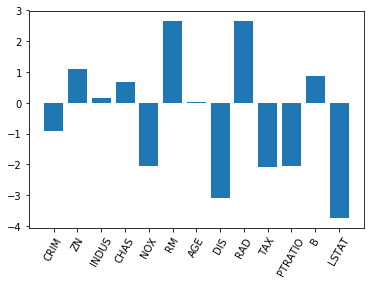

In [81]:
plt.bar(boston.feature_names, model1.coef_)
plt.xticks(rotation=60)
plt.show()

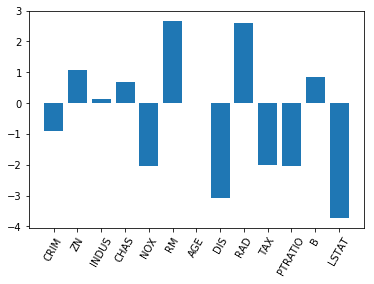

In [84]:
plt.bar(boston.feature_names, model2.coef_)
plt.xticks(rotation=60)
plt.show()

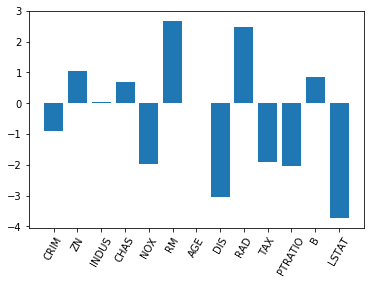

In [82]:
plt.bar(boston.feature_names, model3.coef_)
plt.xticks(rotation=60)
plt.show()

In [96]:
wines = datasets.load_wine()
X,y = wines.data,wines.target
X_shuffle,y_shuffle = shuffle(X,y,random_state=42)
scalar = StandardScaler()
scalar.fit(X_shuffle)
X_scaled = scalar.transform(X_shuffle)
params = {
    'n_neighbors': range(1,21),
    'weights' : ['uniform','distance'], 
    'p': [1,2,3]
}

model = GridSearchCV(KNeighborsClassifier(),params,cv=5,n_jobs=-1)
model.fit(X_scaled,y_shuffle)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 21), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [98]:
model.best_params_

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [99]:
model.best_score_

0.9775280898876404

In [110]:
params = {
#     'C': powers    
    'C': zoomed*0.01
}

model = GridSearchCV(LogisticRegression(),params,cv=5,n_jobs=-1)
model.fit(X_scaled,y_shuffle)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([0.01, 0.02, ..., 0.99, 1.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [111]:
model.best_params_

{'C': 0.1}

In [112]:
model.best_score_

0.9887640449438202

In [113]:
0.01-1 => 100 values here

(1,100)*0.01
(0.01,1)=> 100 values

SyntaxError: invalid syntax (<ipython-input-113-56ccf44af647>, line 1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [115]:
Full data - 1 billion points

Dataset - 500 points
=> we might over-fit your hyper-paramaters to the data.

CV 80% train, 20%test
5 folds


Keep 1 seperate validation. Dont use it at all. Use it only for final score,
once all fine-tuning is done


train, test

Cross-validation 
TRAIN,Test

cross-validation ,hyper-parameter tuning - train

Last step verify with test


SyntaxError: invalid syntax (<ipython-input-115-fa75e0d577fa>, line 1)

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_shuffle,
                                                test_size=0.3)

In [118]:
params = {
    'n_neighbors': range(1,21),
    'weights' : ['uniform','distance'], 
    'p': [1,2,3]
}
model= GridSearchCV(KNeighborsClassifier(),params,cv=5,n_jobs=-1)
model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 21), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [119]:
model.best_params_

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [120]:
model.best_score_

0.9596774193548387

In [121]:
model.score(X_test,y_test)

0.9629629629629629

In [126]:
params = {
#     'C': powers   
    'C': zoomed*0.1
    
}

model = GridSearchCV(LogisticRegression(),params,cv=5,n_jobs=-1)
model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([ 0.1,  0.2, ...,  9.9, 10. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [127]:
model.best_params_

{'C': 0.30000000000000004}

In [128]:
model.best_score_

0.9838709677419355

In [129]:
model.score(X_test,y_test)

0.9814814814814815

In [1]:
(1)Cancer - classification

shuffle
scaling
train_test split
griseearchcv hyperparamater tuning
validate on testset



(1)KNN
(2)LogisiticRegression

(2) Diabetes dataset - regression

   (1)KNN regressor
    (2)Linear regression,Ridge,Lasso
    

Best possible score

(3)datasets.load_digits 

try KNN,LogisticRegression

=> highest ???



SyntaxError: invalid syntax (<ipython-input-1-d94693e2a333>, line 1)

In [2]:
Algorithms
1) KNN classifier,regressor
2) Linear regression,Logistic regression,Ridge,Lasso  - linearity 





ML Techniques
1) train test split
2) cross validation
3) regulariation
4) grid search cv
5) scaling
6) shuffling
7) Categorical Data
8) missing values




SyntaxError: invalid syntax (<ipython-input-2-47bc8dd2cac2>, line 2)

In [4]:
titanic = pd.read_csv('Downloads/titanic/train.csv')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Sex
# # female->1
# # male ->0

# Embarked
# 0  -> S
# 1  -> C
# 2  -> G


# Distance from S to G is double distance from S to C


# Embarked * a10 
# => S -> 0
#    C -> a
#    G  -> 2a


# =>  
# Electrical              - 1 - 1a
# Computer Science        - 2 - 2a
# Civil                   - 3 - 3a
# Mechanical              - 4 - 4a





In [8]:
pd.get_dummies(titanic, columns=['Sex','Embarked'],drop_first=True)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,0,0,0


In [9]:
# Dependant column

male = 1-female

5+ 2* male + 3 * female


a1*(1-female)+a2*female


5 + 2 * (1-female)+3*female


7 + 1 * female

NameError: name 'female' is not defined

In [10]:
A+
A
B+
B
C
D
E
F



A+
B+
C

A+
A
B+



Extra columns in train not in test - > create those columns in test with 0 as all values
Extra column in test not i train -> remove this column

SyntaxError: invalid syntax (<ipython-input-10-b08139af1f1c>, line 1)

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
# how to deal with null values in train, test 


# 1) Remove those rows. 889 rows. 
# If this problem came in test.


# 2) Age - 714 columns left you lost 250 rows of data.



In [16]:
titanic['Age'].fillna(np.mean(titanic['Age']),inplace=True)

In [17]:
titanic['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

In [31]:
titanic['Embarked'].fillna(mode(titanic['Embarked']).mode[0],inplace=True)

/home/ravi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [29]:
mode(titanic['Embarked']).mode[0]

/home/ravi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


'S'

In [33]:
# Better way to deal with missing values



0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [34]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


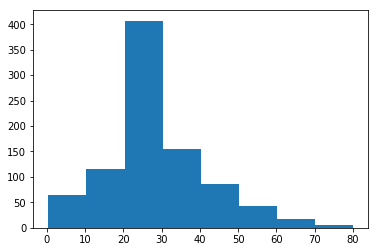

In [39]:
plt.hist(titanic['Age'],bins=8)
plt.show()

In [40]:
cancer = datasets.load_breast_cancer()
X,y=cancer.data,cancer.target

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [42]:
#
Supervised learning

You need to predict some column value
you have train data with correct answers
your algorithm needs to predict for new data that column value


Unsupervised Learning


SyntaxError: invalid syntax (<ipython-input-42-8108638b1cd8>, line 2)

In [43]:
iris= datasets.load_iris()
X,y=iris.data,iris.target

In [44]:
X_2d = X[:,[2,3]]

In [45]:
X_2d

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

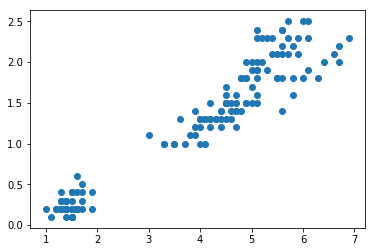

In [48]:
plt.scatter(X_2d[:,0],X_2d[:,1])
plt.show()

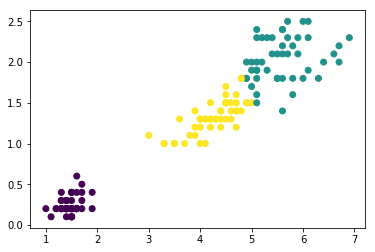

In [59]:
model = KMeans(n_clusters=3)
model.fit(X_2d)
labels= model.predict(X_2d)
plt.scatter(X_2d[:,0],X_2d[:,1],c= labels)
plt.show()


In [51]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [60]:
1) select n random points as cluster centers
2) classify the points into clusters 
   based on which center is closest to each point
3) New cluster centers are centroid of each cluster points
4) Keep repeating Step2,3 till cluster centers no longer change



SyntaxError: invalid syntax (<ipython-input-60-ef0a1ad14f05>, line 1)

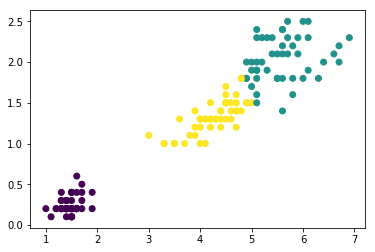

In [61]:
model = KMeans(n_clusters=3)
model.fit(X_2d)
labels= model.predict(X_2d)
plt.scatter(X_2d[:,0],X_2d[:,1],c= labels)
plt.show()

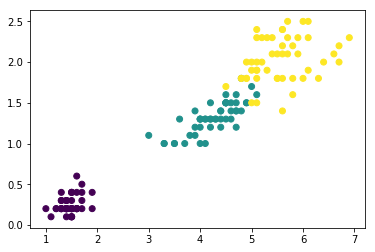

In [62]:
plt.scatter(X_2d[:,0],X_2d[:,1],c= y)
plt.show()

In [63]:
df = pd.DataFrame({'species': y,'labels': labels})
pd.crosstab(df.species,df.labels)

labels,0,1,2
species,,,
0,50,0,0
1,0,2,48
2,0,46,4


In [64]:
for i in range(len(iris.target_names)):
    df.species.replace(i,iris.target_names[i],inplace=True)

In [65]:
pd.crosstab(df.species,df.labels)

labels,0,1,2
species,,,
setosa,50,0,0
versicolor,0,2,48
virginica,0,46,4


In [66]:
model.cluster_centers_

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [2]:
wine = datasets.load_wine()
X,y= wine.data,wine.target
model= KMeans(n_clusters=3)
model.fit(X)
labels = model.predict(X)
df = pd.DataFrame({'wines': y, 'labels': labels})
pd.crosstab(df.wines,df.labels)

labels,0,1,2
wines,,,
0,0,46,13
1,50,1,20
2,19,0,29


In [3]:
X_scaled = StandardScaler().fit_transform(X)
model.fit(X_scaled)
labels = model.predict(X_scaled)
df = pd.DataFrame({'wines': y, 'labels': labels})
pd.crosstab(df.wines,df.labels)

labels,0,1,2
wines,,,
0,0,59,0
1,3,3,65
2,48,0,0


In [5]:
# TSNE

We have n dimensional data n =10,15,30


TSNE-

It maps n dimensional points to 2D
trying to keep distances as close to original as possible

SyntaxError: invalid syntax (<ipython-input-5-77e27ce7c809>, line 3)

In [6]:
X_tsne = TSNE().fit_transform(X)

In [8]:
X.shape

(178, 13)

In [9]:
X_tsne.shape

(178, 2)

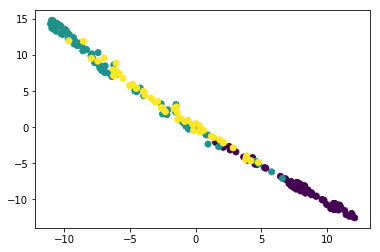

In [12]:
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y)
plt.show()

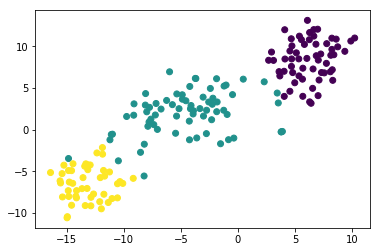

In [17]:
wine = datasets.load_wine()
X,y= wine.data,wine.target
X_scaled = StandardScaler().fit_transform(X)
X_tsne_scaled = TSNE(random_state=42).fit_transform(X_scaled)
plt.scatter(X_tsne_scaled[:,0],X_tsne_scaled[:,1],c=y)
plt.show()

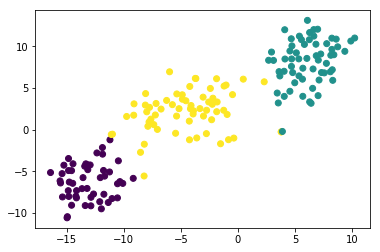

In [18]:
plt.scatter(X_tsne_scaled[:,0],X_tsne_scaled[:,1],c=labels)
plt.show()

In [19]:
PCA - 
Principal Component Analysis


Average house price prediction in area



number_of_males_in_area
number_of_females_in_area
no_of_people_in_area

Instrinsic Dimension - 1


embarked_S
embarked_C
embarked_Q

Instrinsic Dimension - 2





SyntaxError: invalid syntax (<ipython-input-19-84589c8cbc4f>, line 1)

In [20]:
boston = datasets.load_boston()

In [21]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [23]:
cancer= datasets.load_breast_cancer()
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [24]:
1) Storage space is less
2) 10 columns , 30 columns -> calculation time decreases by a lot
3) Noisy columns,information you can remove , which might actually help prevent overfitting
and perform better on train

SyntaxError: invalid syntax (<ipython-input-24-d9f6990851b0>, line 1)

In [25]:
y = b + a1*x1 + a2*x2 +a3 * x3

x1-> x1-c


y = b + a1* (x1-c)+a2*x2+...
   = (b-a1*c)+ a1*x1+ 

SyntaxError: invalid syntax (<ipython-input-25-b1f8452f5610>, line 3)

In [33]:
X = cancer.data
y=cancer.target

In [28]:
X_scaled = StandardScaler().fit_transform(X)

In [30]:
pca= PCA()
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

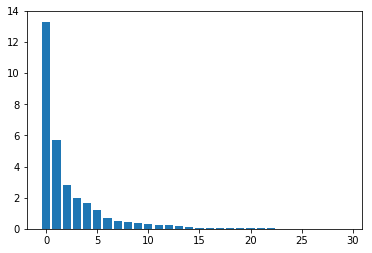

In [31]:
plt.bar(range(len(pca.explained_variance_)), pca.explained_variance_)
plt.show()

In [34]:
params_log= {
    'C': powers
}
model = GridSearchCV(LogisticRegression(),params_log,cv=5,n_jobs=-1)
model.fit(X_scaled,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
model.best_params_

{'C': 0.1}

In [36]:
model.best_score_

0.9824253075571178

In [47]:

X_scaled_pca = PCA(n_components=9).fit_transform(X_scaled)
model = GridSearchCV(LogisticRegression(),params_log,cv=5,n_jobs=-1)
model.fit(X_scaled_pca,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
model.best_params_

{'C': 1}

In [49]:
model.best_score_

0.9824253075571178

In [51]:
pca.get_covariance()

array([[ 1.00176056e+00,  3.24351929e-01,  9.99612069e-01,
         9.89095475e-01,  1.70881506e-01,  5.07014640e-01,
         6.77955036e-01,  8.23976636e-01,  1.48001350e-01,
        -3.12179472e-01,  6.80285970e-01, -9.74887767e-02,
         6.75358538e-01,  7.37159198e-01, -2.22992026e-01,
         2.06362656e-01,  1.94545531e-01,  3.76831225e-01,
        -1.04504545e-01, -4.27163418e-02,  9.71245907e-01,
         2.97530545e-01,  9.66835698e-01,  9.42739295e-01,
         1.19826732e-01,  4.14190751e-01,  5.27839123e-01,
         7.45524434e-01,  1.64241985e-01,  7.07832563e-03],
       [ 3.24351929e-01,  1.00176056e+00,  3.30113223e-01,
         3.21650988e-01, -2.34296930e-02,  2.37118951e-01,
         3.02950254e-01,  2.93980713e-01,  7.15266864e-02,
        -7.65717560e-02,  2.76354360e-01,  3.87037830e-01,
         2.82169018e-01,  2.60302460e-01,  6.62542133e-03,
         1.92312595e-01,  1.43545353e-01,  1.64139495e-01,
         9.14323671e-03,  5.45533955e-02,  3.53193674e-

In [55]:
pca.singular_values_

array([86.93235745, 56.90677266, 40.04263937, 33.57058877, 30.62887007,
       26.2104161 , 19.60102663, 16.46800391, 15.4017255 , 14.12602481,
       12.93205441, 12.19019359, 11.71889139,  9.4519063 ,  7.31866075,
        6.74106325,  5.81360925,  5.47175363,  5.30591648,  4.21066503,
        4.12971871,  3.95133143,  3.72155031,  3.20519874,  2.96796958,
        2.15709923,  1.98150547,  0.95096438,  0.65273958,  0.27514088])

In [57]:
pca.components_.shape

(30, 30)

In [60]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [61]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [62]:
diabetes = datasets.load_diabetes()
X,y= diabetes.data,diabetes.target

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                random_state=42)

In [67]:
scaler = StandardScaler()
pca = PCA()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
params_ridge ={
    'alpha': powers
}

model= GridSearchCV(Ridge(),params_ridge,cv=5,n_jobs=-1)
model.fit(X_train_scaled_pca,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
model.best_params_

{'alpha': 1}

In [69]:
model.best_score_

0.4536748226466356

In [80]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled_pca = pca.transform(X_test_scaled)
model.score(X_test_scaled_pca,y_test)
X.shape

(442, 10)

In [81]:
params_pipe_ridge={
    'lasso__alpha': powers,
    'pca__n_components': range(1,11)
}

pipeline = make_pipeline(StandardScaler(),PCA(),Lasso())
model = GridSearchCV(pipeline,params_pipe_ridge,cv=5,n_jobs=-1)
model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0], 'pca__n_components': range(1, 11)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [82]:
model.best_params_

{'lasso__alpha': 0.1, 'pca__n_components': 7}

In [83]:
model.best_score_

0.45758160367668327

In [84]:
model.score(X_test,y_test)

0.4787606873887731

In [86]:
diabetes_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [87]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [88]:
forest = datasets.fetch_covtype()

In [89]:
print(forest.DESCR)

Forest covertype dataset.

A classic dataset for classification benchmarks, featuring categorical and
real-valued features.

The dataset page is available from UCI Machine Learning Repository

    http://archive.ics.uci.edu/ml/datasets/Covertype

Courtesy of Jock A. Blackard and Colorado State University.



In [90]:
forest.keys()

dict_keys(['data', 'target', 'DESCR'])

In [91]:
forest.target

array([5, 5, 2, ..., 3, 3, 3], dtype=int32)

In [94]:
forest.data.shape

(581012, 54)

In [95]:
4*6e5*54

129600000.0

In [97]:
X_train,X_test,y_train,y_test = train_test_split(forest.data,forest.target,
                                                test_size=2000,
                                                train_size=2000,
                                                random_state=42,
                                                stratify=forest.target)

In [98]:
del forest

In [108]:
%%time
params_pipe_log= {
    'pca__n_components': [51],
    'logisticregression__C': powers
}
pipeline = make_pipeline(StandardScaler(),PCA(),LogisticRegression())
model= GridSearchCV(pipeline,params_pipe_log,cv=5,n_jobs=-1)
model.fit(X_train,y_train)

CPU times: user 1.29 s, sys: 92.3 ms, total: 1.38 s
Wall time: 16.1 s


In [109]:
model.best_params_

{'logisticregression__C': 1000.0, 'pca__n_components': 51}

In [110]:
model.best_score_

0.703

In [111]:
model.score(X_test,y_test)

0.72

In [112]:
Wine
Boston

NameError: name 'Wine' is not defined

In [ ]:
100 rows 30 columns


100*30 -> 30*pca_componets -> 


